<a href="https://colab.research.google.com/github/laetscbe/ADS_Projekt/blob/main/ADS_Klassifikationsprojekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Verbindung mit Drive - Datanablage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Versionskontrolle und Zusammenarbeit in Google Colab
##### Veröffentlichung des Codes auf GitHub: https://github.com/laetscbe/ADS_Projekt

# Daten generieren

### Vorbereitung

In [ ]:
!pip install flickrapi
!pip install tensorflow

     |████████████████████████████████| 61kB 8.3MB/s 


# Download Cat/Dog-Images using Flickr-API

In [ ]:
import flickrapi
import urllib.request
import os
from os import makedirs

# Working directory
image_folder =  "./drive/MyDrive/ADS_Projekt/flickr"

makedirs(image_folder, exist_ok=True)

print(os.getcwd())

# Flickr api access key 
flickr=flickrapi.FlickrAPI('c6a2c45591d4973ff525042472446ca2', '202ffe6f387ce29b', cache=True)

# Keyword
keywords = ['cat','dog']
noOfimagesPerKeyword = 500; #effective no. of findings might be lower - 500 is max according to https://stuvel.eu/software/flickrapi/

for keyword in keywords:
    # Settings
    photos = flickr.walk(text=keyword,
                     tag_mode='all',
                     tags=keyword,
                     extras='url_c',
                     per_page=noOfimagesPerKeyword,
                     sort='relevance')

    # Initialize list
    urls = []

    # Derive urls
    for i, photo in enumerate(photos):
        url = photo.get('url_c')
        urls.append(url)

        # Get requested noOfimagesPerKeyword urls
        if i > noOfimagesPerKeyword:
            break

    # Filter 'None' values from list
    urls_clean = list(filter(None, urls)) 
    urls_clean

    # Print cleaned list
    for i, url in enumerate(urls_clean):
            print(urls_clean[i])
            
    # Download all photos using the urls and save it in the working directory
    for i, url in enumerate(urls_clean):
        fullfilename = os.path.join(str(image_folder),str(keyword+'.' + str(i) + '.jpg'))
        print(fullfilename)
        urllib.request.urlretrieve(url,  fullfilename)
   

/content
https://live.staticflickr.com/5598/14934282524_344c84246b_c.jpg
https://live.staticflickr.com/4838/45925416992_c9caac8cb9_c.jpg
https://live.staticflickr.com/4676/25690386427_8c2b3eaf76_c.jpg
https://live.staticflickr.com/2813/32711702733_7cdd9dbb3a_c.jpg
https://live.staticflickr.com/8750/16386660144_a6c4026657_c.jpg
https://live.staticflickr.com/3677/13545844805_170ec3746b_c.jpg
https://live.staticflickr.com/7210/6843831417_861d6996e8_c.jpg
https://live.staticflickr.com/7830/46550224945_577b036632_c.jpg
https://live.staticflickr.com/4728/39256672581_c48569e3a2_c.jpg
https://live.staticflickr.com/3845/14284324148_360ae173b8_c.jpg
https://live.staticflickr.com/7302/11991979753_eac1d33dd8_c.jpg
https://live.staticflickr.com/7073/7190755946_ea97e85765_c.jpg
https://live.staticflickr.com/3946/14934292534_32b0302f2d_c.jpg
https://live.staticflickr.com/8065/8168159947_94b3a89a2a_c.jpg
https://live.staticflickr.com/3914/15171599148_6ef1d09dab_c.jpg
https://live.staticflickr.com/7183

# Datenaufbereitung

In [ ]:
import tensorflow as tf
import os
import pathlib
import numpy as np
import cv2

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = "./drive/MyDrive/ADS_Projekt/flickr/"

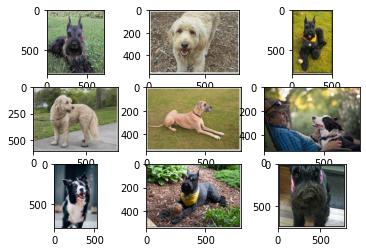

In [ ]:
# plot first few images - Dogs
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

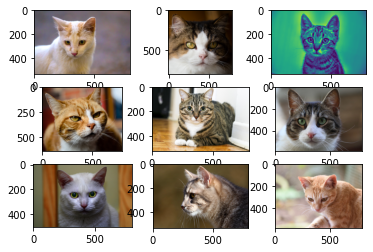

In [ ]:
# plot first few images - Cats
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

## Spliten der Daten

In [ ]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

In [ ]:
# organize dataset into a useful structure
# create directories
dataset_home = "./drive/MyDrive/ADS_Projekt/"
subdir = ['Image_comp']

In [ ]:
for subdir in subdir:
    newdir = dataset_home + subdir
    makedirs(newdir, exist_ok=True)
    
dataset_home = "./drive/MyDrive/ADS_Projekt/Image_comp/"
subdir = ['dogs/', 'cats/']
for subdir in subdir:
    newdir = dataset_home + subdir
    makedirs(newdir, exist_ok=True)

In [ ]:
src_directory = "./drive/MyDrive/ADS_Projekt/flickr/"
for file in listdir(src_directory):
    src = src_directory + '/' + file
    if file.startswith('cat'):
        dst = dataset_home + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + 'dogs/'  + file
        copyfile(src, dst)

In [ ]:
pip install split-folders

In [ ]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
import splitfolders
import cv2
import os

In [ ]:
#splitting in Train-, Validation- und Test-Datasets
splitfolders.ratio("./drive/MyDrive/ADS_Projekt/Image_comp/", output="./drive/MyDrive/ADS_Projekt/Image_complete_final/", seed=1337, ratio=(.8,0.1,0.1))

Copying files: 953 files [02:54,  5.45 files/s]


In [ ]:
data_dir = "./drive/MyDrive/ADS_Projekt/"
data_dir_images = data_dir + "/images_complete_final"

#### Darstellung der Datenaufteilung




Data Structure:

Image_complete_final
¦_ train
   ¦_ dogs
   ¦_ cats
¦_ val
   ¦_ dogs
   ¦_ cats
¦_ test
   ¦_ dogs
   ¦_ cats

Data-Set Distribution:



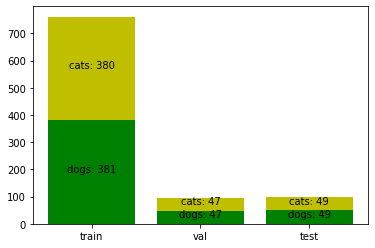

In [ ]:
names, counter, sets = [], [], []

print('Data Structure:\n')

for root, dirs, files in os.walk("./drive/MyDrive/ADS_Projekt/Image_complete_final"):
    name = os.path.basename(root)
    #print('root {}'.format(root))
    #print(dirs)
    #print(files)
    if len(files) > 0:
        counter.append(len(files))
        print('   ¦_ {}'.format(name))
        if name not in names:
            names.append(name)
    elif name != 'Image_complete_final':
        print('¦_ {}'.format(name))
        sets.append(name)
    else: 
        print(name)

print('\nData-Set Distribution:\n')

plt.bar(sets,[counter[0],counter[2],counter[4]], color='g')
plt.text(0,counter[0]/2,'{}: {}'.format(names[0],counter[0]), horizontalalignment='center')
plt.text(1,counter[2]/2,'{}: {}'.format(names[0],counter[2]), horizontalalignment='center')
plt.text(2,counter[4]/2,'{}: {}'.format(names[0],counter[4]), horizontalalignment='center')
plt.text(0,counter[0]+counter[1]/2,'{}: {}'.format(names[1],counter[1]), horizontalalignment='center')
plt.text(1,counter[2]+counter[3]/2,'{}: {}'.format(names[1],counter[3]), horizontalalignment='center')
plt.text(2,counter[4]+counter[5]/2,'{}: {}'.format(names[1],counter[5]), horizontalalignment='center')
plt.bar(sets,[counter[1],counter[3],counter[5]], bottom=[counter[0],counter[2],counter[4]], color='y')

plt.show()

In [ ]:
images, labels = [], []

#Variabeln für Bildbreite / Bildhöhe definieren
img_w, img_h = 220, 220

for root, dirs, files in os.walk("./drive/MyDrive/ADS_Projekt/Image_complete_final/val/"):
    tmp = os.path.basename(root)
    for file in files:
        labels.append(tmp)
        try:
            image = cv2.imread(root+'/'+file)
            image = cv2.resize(image,(int(img_w*1.5), int(img_h*1.5)))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
        except Exception as e:
            print(e,file)
            
images = np.array(images)

In [ ]:
for i, n in enumerate(labels):
    for j, k in enumerate(names):
        if n == k:
            labels[i] = j
labels = np.array(labels)

In [ ]:
print(images.shape)
print(labels.shape)

(94, 330, 330, 3)
(94,)


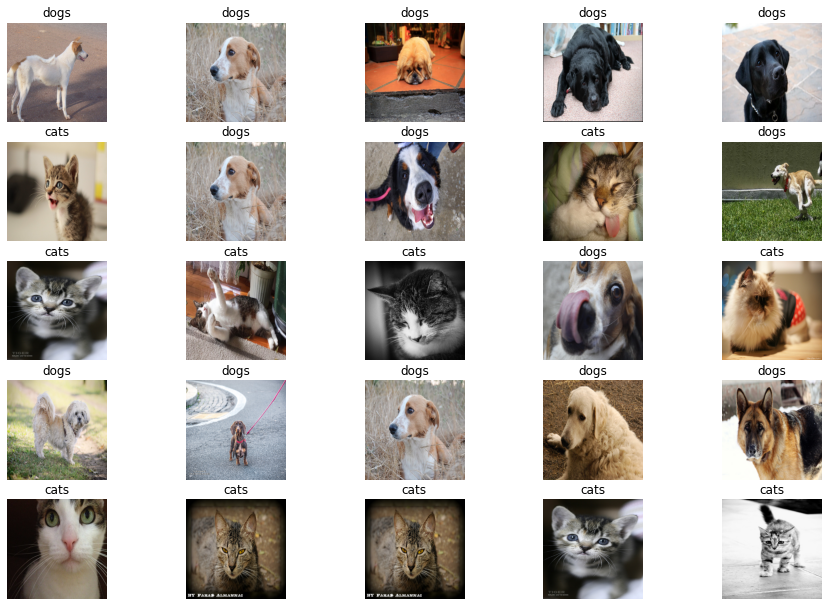

In [ ]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,2,2)
for i in range(0,5):
    for j in range(0,5):
        rnd = randint(0,len(images))
        cl = labels[rnd]
        ax[i,j].imshow(images[rnd])
        ax[i,j].set_title(names[cl])
        ax[i,j].axis('off')

# CNN

In [ ]:
!pip install np_utils

     |████████████████████████████████| 61kB 7.4MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-cp37-none-any.whl size=57133 sha256=e10ea7d45c9af763dbe7c5adb4de6e9a8910c591fa09c3b6a61028bc146fe91a
  Stored in directory: /root/.cache/pip/wheels/92/4b/81/206efd0d01330a96f3aebe5021d2d5f0b264b7ade827c306ef
Successfully built np-utils


In [ ]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import keras.utils
from keras.utils.np_utils import to_categorical
import numpy as np

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
 
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
 
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


#### activation function Relu: 
#####Rectified Linear Units - Wert ein Zahlen kann zwischen 0 und Z sein Negative Werte fallen weg, bzw, werden als 0 übernommen. nur für neurnale Netzwerke, kann sehr gross werden da [0, inf), es können Layer verlorgen gehen da negative werte auf 0 gesetzt werden und 0 keine aussage macht. weniger Rechenintensiv als sigmoid.

#### activation function sigmoid: 
#####wandelt den Wert in eine Zahl zwischen 0 und 1. die Funktion ist nicht linear, kontinuierlich differenzierbar, gleichmässig und hat einen defineirten Ausgabebereich. eignbet sich für klassifizierungen


In [ ]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)
	
# prepare iterators
train_it = datagen.flow_from_directory("./drive/MyDrive/ADS_Projekt/Image_complete_final/train/",
	class_mode='binary', batch_size=64, target_size=(200, 200))
val_it = datagen.flow_from_directory("./drive/MyDrive/ADS_Projekt/Image_complete_final/val/",
	class_mode='binary', batch_size=64, target_size=(200, 200))
	

Found 761 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


In [ ]:
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),
	validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)
	
# evaluate model
_, acc = model.evaluate(val_it, steps=len(val_it), verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/10
12/12 [==============================] - 41s 2s/step - loss: 1.1055 - accuracy: 0.4941 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 26s 2s/step - loss: 0.6943 - accuracy: 0.5113 - val_loss: 0.6823 - val_accuracy: 0.5957
Epoch 3/10
12/12 [==============================] - 26s 2s/step - loss: 0.7050 - accuracy: 0.5345 - val_loss: 0.6888 - val_accuracy: 0.5851
Epoch 4/10
12/12 [==============================] - 26s 2s/step - loss: 0.6940 - accuracy: 0.5535 - val_loss: 0.6946 - val_accuracy: 0.4787
Epoch 5/10
12/12 [==============================] - 26s 2s/step - loss: 0.6949 - accuracy: 0.4907 - val_loss: 0.6921 - val_accuracy: 0.4894
Epoch 6/10
12/12 [==============================] - 26s 2s/step - loss: 0.6830 - accuracy: 0.5341 - val_loss: 0.6839 - val_accuracy: 0.5957
Epoch 7/10
12/12 [==============================] - 26s 2s/step - loss: 0.6674 - accuracy: 0.5997 - val_loss: 0.6797 - val_accuracy: 0.5319
Epoch 8/10
12/12 [==

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 64.894


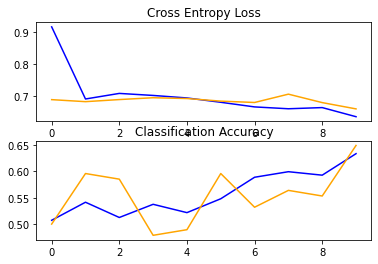

In [ ]:
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='val')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='val')


In [ ]:
test_loss, test_acc = model.evaluate(val_it, verbose=2)
modelAcc = str(test_acc)
print(modelAcc)

2/2 - 1s - loss: 0.6596 - accuracy: 0.6489
0.6489361524581909


In [ ]:
# save plot to file
filename = sys.argv[0].split('/')[-1]
pyplot.savefig(filename + '_plot.png')
pyplot.close()

# mit 3 Blöcken

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
 
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
 
	# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)            

In [ ]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)
	
# prepare iterators
train_it = datagen.flow_from_directory("./drive/MyDrive/ADS_Projekt/Image_complete_final/train/",
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory("./drive/MyDrive/ADS_Projekt/Image_complete_final/test/",
	class_mode='binary', batch_size=64, target_size=(200, 200))
	
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),
	validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	
# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

Found 761 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - 62s 5s/step - loss: 1.0015 - accuracy: 0.4829 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 61s 5s/step - loss: 0.6915 - accuracy: 0.5237 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 61s 5s/step - loss: 0.6709 - accuracy: 0.6036 - val_loss: 0.6911 - val_accuracy: 0.5306
Epoch 4/10
12/12 [==============================] - 61s 5s/step - loss: 0.6770 - accuracy: 0.5564 - val_loss: 0.6902 - val_accuracy: 0.5306
Epoch 5/10
12/12 [==============================] - 60s 5s/step - loss: 0.6538 - accuracy: 0.6192 - val_loss: 0.6838 - val_accuracy: 0.6224
Epoch 6/10
12/12 [==============================] - 60s 5s/step - loss: 0.6378 - accuracy: 0.6567 - val_loss: 0.7090 - val_accuracy: 0.5000
Epoch 7/10
12/12 [==============================] - 61s 5s/step - loss: 0.6439 

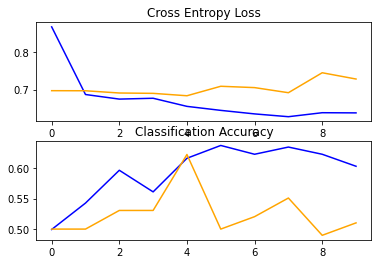

In [ ]:
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='val')

# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='val')


In [ ]:
test_loss, test_acc = model.evaluate(val_it, verbose=2)
modelAcc = str(test_acc)
print(modelAcc)

In [ ]:
# save plot to file
pyplot.savefig('Drei_Block_plot.png')
pyplot.close()

#### Konfusionsmatrix

In [ ]:
conf_datagen = ImageDataGenerator(
    rescale = 1./255,
)

conf_generator = conf_datagen.flow_from_directory(
    "./drive/MyDrive/ADS_Projekt/Image_complete_final/val/",
    #x_col = 'filename',
    #y_col = 'category',
    class_mode = 'binary',
    batch_size = 64,
    target_size = (200, 200),
    shuffle = False
    
)

In [ ]:
y_predict = model.predict(conf_generator)

In [ ]:
y_predict = np.where(y_predict > 0.5, 1, 0)

In [ ]:
p = conf_generator.classes
q = y_predict
p = np.array(p)
q = q.flatten()

In [ ]:
import seaborn as sns

cfm = confusion_matrix(p, q)
print(cfm)
ax= plt.subplot()
sns.heatmap(cfm, annot=True, ax = ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['cats', 'dogs'])
ax.yaxis.set_ticklabels(['cats', 'dogs'])

In [ ]:
print(classification_report(p,q))

# Drop Versuch

In [ ]:
# baseline model with dropout for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
 
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
 
	# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 128)      

In [ ]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)
	
# prepare iterators
train_it = datagen.flow_from_directory("./drive/MyDrive/ADS_Projekt/Image_complete_final/train/",
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory("./drive/MyDrive/ADS_Projekt/Image_complete_final/test/",
	class_mode='binary', batch_size=64, target_size=(200, 200))
	
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),
	validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	
# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

Found 761 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - 66s 5s/step - loss: 1.3465 - accuracy: 0.4958 - val_loss: 0.6938 - val_accuracy: 0.4694
Epoch 2/10
12/12 [==============================] - 64s 5s/step - loss: 0.6812 - accuracy: 0.5522 - val_loss: 0.6916 - val_accuracy: 0.5714
Epoch 3/10
12/12 [==============================] - 64s 5s/step - loss: 0.6944 - accuracy: 0.5173 - val_loss: 0.6929 - val_accuracy: 0.4796
Epoch 4/10
12/12 [==============================] - 64s 5s/step - loss: 0.6921 - accuracy: 0.5091 - val_loss: 0.6903 - val_accuracy: 0.6020
Epoch 5/10
12/12 [==============================] - 64s 5s/step - loss: 0.6865 - accuracy: 0.5379 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 6/10
12/12 [==============================] - 64s 5s/step - loss: 0.6827 - accuracy: 0.5589 - val_loss: 0.6879 - val_accuracy: 0.6224
Epoch 7/10
12/12 [==============================] - 64s 5s/step - loss: 0.6888 

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 64.286


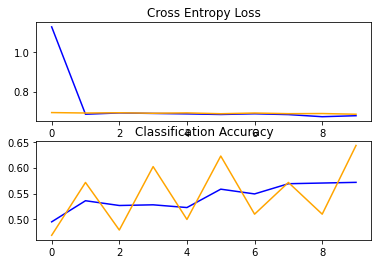

In [ ]:
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='val')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='val')


In [ ]:
# save plot to file
pyplot.savefig('Drop_out_model_plot.png')
pyplot.close()

# Image Data Augmentation

In [ ]:
# baseline model with data augmentation for the dogs vs cats dataset
import sys
from matplotlib import pyplot
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
 
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
 
	# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary() 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 80000)            

In [ ]:
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
	width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = train_datagen.flow_from_directory("./drive/MyDrive/ADS_Projekt/Image_complete_final/train/",
	class_mode='binary', batch_size=64, target_size=(200, 200))
val_it = test_datagen.flow_from_directory("./drive/MyDrive/ADS_Projekt/Image_complete_final/val/",
	class_mode='binary', batch_size=64, target_size=(200, 200))

# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),
validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)

# evaluate model
_, acc = model.evaluate(val_it, steps=len(val_it), verbose=0)
print('> %.3f' % (acc * 100.0))

Found 761 images belonging to 2 classes.
Found 94 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - 67s 5s/step - loss: 0.9719 - accuracy: 0.5010 - val_loss: 0.7161 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 65s 5s/step - loss: 0.7149 - accuracy: 0.4665 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 65s 5s/step - loss: 0.6875 - accuracy: 0.5348 - val_loss: 0.6890 - val_accuracy: 0.6277
Epoch 4/10
12/12 [==============================] - 65s 5s/step - loss: 0.6886 - accuracy: 0.5680 - val_loss: 0.6852 - val_accuracy: 0.6064
Epoch 5/10
12/12 [==============================] - 65s 5s/step - loss: 0.6840 - accuracy: 0.5969 - val_loss: 0.6827 - val_accuracy: 0.6383
Epoch 6/10
12/12 [==============================] - 65s 5s/step - loss: 0.6788 - accuracy: 0.5906 - val_loss: 0.6834 - val_accuracy: 0.5213
Epoch 7/10
12/12 [==============================] - 65s 5s/step - loss: 0.6830 

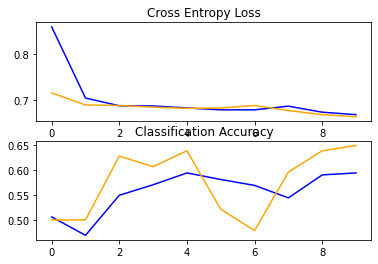

In [ ]:
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='val')


# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='val')


In [ ]:
# save plot to file
#filename = sys.argv[0].split('/')[-1]
#pyplot.savefig(filename + '_plot.png')
#pyplot.close()

# Transfer Learning

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
#from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# define cnn model
#def define_model():
# load model
model = VGG16(include_top=False, input_shape=(224, 224, 3))
# mark loaded layers as not trainable
for layer in model.layers:
	layer.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	#return model

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary() 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# create data generator
datagen = ImageDataGenerator(featurewise_center=True)

# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = datagen.flow_from_directory("./drive/MyDrive/ADS_Projekt/Image_complete_final/train/",
	class_mode='binary', batch_size=64, target_size=(224, 224))
val_it = datagen.flow_from_directory("./drive/MyDrive/ADS_Projekt/Image_complete_final/val/",
	class_mode='binary', batch_size=64, target_size=(224, 224))

# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),
validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)

# evaluate model
_, acc = model.evaluate(val_it, steps=len(val_it), verbose=0)
print('> %.3f' % (acc * 100.0))

Found 761 images belonging to 2 classes.
Found 94 images belonging to 2 classes.
12/12 [==============================] - 381s 32s/step - loss: 5.5571e-06 - accuracy: 1.0000 - val_loss: 0.8233 - val_accuracy: 0.9574
> 95.745


In [ ]:
data_dir = "./drive/MyDrive/ADS_Projekt/cat_dog_model/"

In [ ]:
model.save(data_dir) 

INFO:tensorflow:Assets written to: ./drive/MyDrive/ADS_Projekt/cat_dog_model/assets


In [ ]:
# gespeichertes Modell laden
model = tf.keras.models.load_model(data_dir)

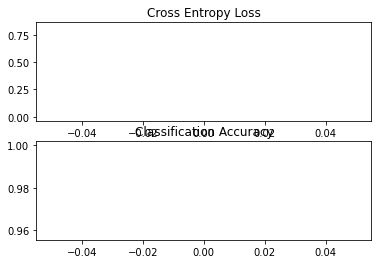

In [ ]:
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='val')
	
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='val')



In [ ]:
# save plot to file

pyplot.savefig('final_model_plot.png')
pyplot.close()

#### Konfusionsmatrix

In [ ]:
conf_datagen = ImageDataGenerator(
    rescale = 1./255,
)

conf_generator = conf_datagen.flow_from_directory(
    "./drive/MyDrive/ADS_Projekt/Image_complete_final/val/",
    #x_col = 'filename',
    #y_col = 'category',
    class_mode = 'binary',
    batch_size = 64,
    target_size = (200, 200),
    shuffle = False
    
)

In [ ]:
y_predict = model.predict(conf_generator)

In [ ]:
y_predict = np.where(y_predict > 0.5, 1, 0)

In [ ]:
p = conf_generator.classes
q = y_predict
p = np.array(p)
q = q.flatten()

In [ ]:
import seaborn as sns

cfm = confusion_matrix(p, q)
print(cfm)
ax= plt.subplot()
sns.heatmap(cfm, annot=True, ax = ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['cats', 'dogs'])
ax.yaxis.set_ticklabels(['cats', 'dogs'])

In [ ]:
print(classification_report(p,q))

# Modelltest mit Test-Dataset

In [ ]:
# Pfad zum gespeicherten Modells
data_dir = "./drive/MyDrive/ADS_Projekt/cat_dog_model"
# Modell laden
model = tf.keras.models.load_model(data_dir)

In [ ]:
test_it = datagen.flow_from_directory("./drive/MyDrive/ADS_Projekt/Image_complete_final/test/", 
  class_mode='binary', batch_size=64, target_size=(224, 224))

# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

Found 98 images belonging to 2 classes.
2/2 [==============================] - 44s 15s/step - loss: 0.8055 - accuracy: 0.9694
> 96.939
